# Связь биномиального распределения с нормальным

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal

## Сгенерируем семпл данных

In [2]:
P = 0.1  # convertion rate
N = 20   # sample size

In [9]:
sample = binomial(1, P, N)
print('sample: %s' % sample)
print('mean: %s' % np.mean(sample))

sample: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
mean: 0.15


## Оценим параметры распределения

In [10]:
M = 1000  # number of experiments

In [11]:
experiments = binomial(1, P, (M, N))
print('experiemnts shape: %sх%s' % experiments.shape)

experiemnts shape: 1000х20


In [14]:
# TODO: оценить среднее для каждого эксперимента
means = np.mean(experiments, axis=1)
means.shape

(1000,)

In [16]:
# TODO: оценить дисперсию средних
std = np.std(means)
std

0.0668758364433672

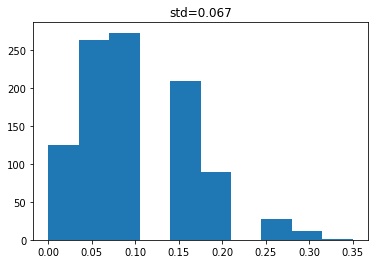

In [19]:
plt.hist(means)
plt.title('std=%.3f' % std);

## Оценим зависимость дисперсии от числа наблюдений

In [20]:
# TODO: построить график зависимости дисперсии от числа наблюдений
std = []
n_samples = list(range(10, 110, 10))

for n in n_samples:
    experiments = binomial(1, P, (M, n))
    means = np.mean(experiments, axis=1)
    std.append(np.std(means))

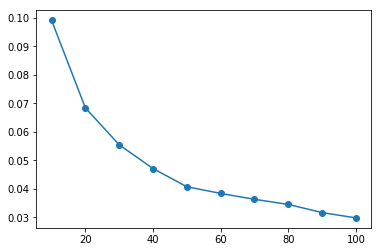

In [23]:
plt.plot(n_samples, std, '-o');

## Сравним распределение средних с нормальным

In [30]:
# https://en.wikipedia.org/wiki/Bernoulli_distribution
mean = P
std = np.sqrt(P * (1 - P) / N)

In [31]:
# TODO: сравнить рампределение с нормальным
random_norm = np.random.normal(P, std, M)
experiments = binomial(1, P, (M, N))
means = np.mean(experiments, axis=1)

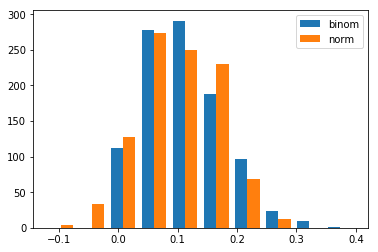

In [33]:
plt.hist([means, random_norm])
plt.legend(['binom', 'norm'])

## Доверительный интервал

In [162]:
N = 10000
P = 0.5

mean = P
std = np.sqrt(P * (1 - P) / N)

confidence = 0.975
z = st.norm.ppf(confidence)
margin = z * std
print('z: %s' % z)
print('margin: %s' % margin)
print('interval: %s %s' % (P - margin, P + margin))

z: 1.959963984540054
margin: 0.00979981992270027
interval: 0.4902001800772997 0.5097998199227003


In [163]:
# TODO: оценить долю средних, вышедших за границы доверительного интервала в эксперименте

In [166]:
experiments = binomial(1, P, (10000, N))
means = np.mean(experiments, axis=1)

In [167]:
np.sum(means - P > margin) / means.shape[0]

0.0256